# Assignment

## Part 1 - Simple

Write a function that takes as input the following:

- another function (note that in Python you can pass functions as arguments to other functions)
- starting point
- temperature 
- learning/decay rate

and then proceeds to apply Simulated Annealing to minimize the function.  This is more or less the same as what has been given above, but you need to encapsulate it all into a simple function and demonstrate how it works on arbitrary functions.  

## Part 2 

Note that part 2 is also part of the regular assignment.  It is **not** optional, but is specified as a separate problem part to break the overall problem into portions in case you find this too hard to solve at one shot.  

The traveling salesman problem gives you a set of city locations (x, y coordinates).  Your goal is to find a route from a given starting point that visits all the cities exactly once and then returns to the origin, with the minimum total distance covered (distance is measured as Euclidean distance $\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$).  

You will be given a file where the first line is the number of cities *N*, and the next *N* lines give the cities as a list of x, y coordinates: for example
```
4
0.0 1.5
2.3 6.1
4.2 1.3
2.1 4.5
```

Your goal is to give a sequence of numbers, for example `[0 3 2 1]` which specifies the order in which to visit the cities.  Note that after the last city you will come back to the first one in the list.  

Plot the cities with the path you have specified, and output the total length of the shortest path discovered so far.

## Report

You need to submit a .zip file that contains all your code (either notebook or plain Python files) and a PDF file (can be generated from the notebook) that clearly documents what you have implemented and how to run your code.  For part 1, you need to also show the output plot that shows how the search proceeded when run on the function given in the presentation.

# Question 1

In [1]:
# Set up imports
%matplotlib ipympl
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def sim_ann(function, temp, decay_rate, start_point):
    best_x = start_point
    best_y = function(best_x)
    
    rangemin, rangemax = -2, 2 
    fig, ax = plt.subplots()
    
    xbase = np.linspace(-2, 2, 100)
    ybase = function(xbase)
    ax.plot(xbase, ybase)
    
    xall, yall = [], []
    lnall,  = ax.plot([], [], 'ro')
    lngood, = ax.plot([], [], 'go', markersize=10)
    
    def onestep(frame):
        nonlocal temp, function, decay_rate, best_x, best_y
        dx = (np.random.random_sample() - 0.5) * temp
        x = best_x + dx
        y = function(x)
        
        if y < best_y:
            # print(f"Improved from {bestcost} at {bestx} to {y} at {x}")
            best_y = y
            best_x = x
            lngood.set_data(x, y)
        else:
            toss = np.random.random_sample()
            if toss < np.exp(-(y-best_y)/temp):
                best_y = y
                best_x = x
                lngood.set_data(x, y)
                
        temp *= decay_rate
        xall.append(x)
        yall.append(y)
        lnall.set_data(xall, yall)
        
    ani= FuncAnimation(fig, onestep, frames=range(100), interval=100, repeat=False)
    plt.show()
    
    return ani

The function `sim_ann` gives us the animation for finding minima of a complex function with many minima's using simulated annealing. I made a generalised function from the sample code given by sir in the presentation PDF.

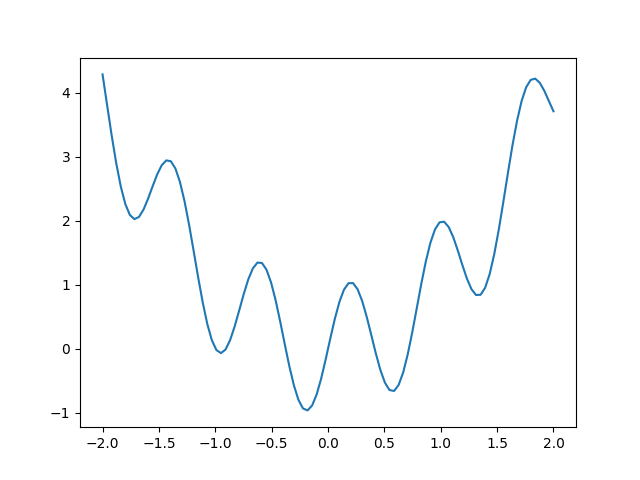

In [3]:
def yfunc(x):
    return x**2 + np.sin(8*x)

start_point = -2
temp = 3.0
decayrate = 0.95

sim_ann(yfunc, temp, decayrate, 1)

# Question 2

In [4]:
def get_coords(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
        
    coords = []
    x_coords = []
    y_coords = []
    
    for line in lines:
        line = line.strip().split()
        if len(line) == 2:
            coords.append((float(line[0]), float(line[1])))
            x_coords.append(float(line[0]))
            y_coords.append(float(line[1]))    
            
    return coords, x_coords, y_coords

This function `get_coords` reads the given file and returns the respective coordinates, x-coordinates and y-coordinates which are present in the file.

In [5]:
def total_distance(coords, city):
    distance = 0
    for i in range(len(city) - 1):
        point1 = city[i]
        point2 = city[i+1]
        a, b = coords[point1], coords[point2]
        
        add_up = math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
        distance+= add_up
        
    distance += math.sqrt((coords[city[0]][0] - coords[city[-1]][0])**2 + (coords[city[0]][1] - coords[city[-1]][1])**2)
         
    return distance

This function `total_distance` will take arguments as the respective order of city and the coordinates. And using this it will calculate the total distance travelled for the following city order and return it.

In [7]:
def alternate(cities, i, j):
    return cities[:i] + cities[i:j+1][::-1] + cities[j+1:]

The function `alternate` will reverse the order of a particular segment in the order of cities. The initial and final index of reversing are given as arguments to the function. 

In [8]:
def rand(s, e):
    x = random.randint(s, e)
    y = x
    while y == x:
        y = random.randint(s, e)
    return x, y

The `rand` function here basically generates 2 distinct random integers in the range from 0 to the total number of cities present. This function is later used to generate two integers under which the segment reversing is done.

In [7]:
def annealing(Coords, Temp, Rate, Max_Iterations):
    min_distance = []
    indices = []
    initial_path = list(range(len(Coords)))
    random.shuffle(initial_path)
    
    initial_dist = total_distance(Coords, initial_path)
    best_path = list(initial_path)
    best_dist = initial_dist

    for i in range(Max_Iterations):
        a, b = rand(0, len(Coords) - 1)
        c, d = min(a, b), max(a, b)
        initial_path = alternate(initial_path, c, d)
        alternate_dist = total_distance(Coords, initial_path)
        
        if alternate_dist < best_dist:
            best_path = initial_path
            best_dist = alternate_dist

        else:
            toss = np.random.random_sample()
            prob = math.exp(-(alternate_dist - best_dist) / Temp)
            
            if toss < prob:
                best_path = initial_path
                best_dist = alternate_dist
            else:
                initial_path = alternate(initial_path, c, d)

        Temp *= Rate
        
    return best_path, best_dist

The given function `annealing` implements the simulated annealing algorithm for finding an approximate solution to the traveling salesman problem. The inputs to the function are:

- Coords: a list of tuples representing the coordinates of the cities to be visited
- Temp: the starting temperature for the annealing process
- Rate: the cooling rate for the annealing process
- Max_Iterations: the maximum number of iterations to run the algorithm for

The function starts by initializing a random path through the cities, represented as a list of indices. It then calculates the total distance of this path by calling the `total_distance()` function.

The function then sets the initial path and distance as the best path and distance found so far. It then enters a loop that runs for the specified maximum number of iterations. In each iteration, the function randomly selects two indices representing two cities in the current path, and swaps the order of the cities between these indices to generate a new path as i mentioned it earlier. It then calculates the distance of this new path using the `total_distance()` function.

If this new distance is shorter than the best distance found so far, it updates the best path and distance.

If the new distance is longer than the best distance, it computes a probability of accepting the new path based on the temperature and the difference in distance between the new and best paths. If a randomly generated number is less than this probability, it accepts the new path as the best path.

If the new path is not accepted, the function reverts to the previous path and temperature is then reduced by a factor of the cooling rate, and the loop continues with the new temperature.

Finally, the function returns the best path and distance found during the iterations. This path represents an approximate solution to the traveling salesman problem.

In [10]:
def optimise(coords, init_temp, cooling_rate, max_iterations):
    distances = []
    indices = []
    
    for i in range(100):
        a, b = annealing(coords, init_temp, cooling_rate, max_iterations)
        indices.append(a)
        distances.append(b)
        
    min_dist = min(distances)
    index_min_dist = distances.index(min_dist)
    precise_path = indices[index_min_dist]
    
    return precise_path, min_dist

The problem with `annealing` function is the output generated by it will vary as you run it multiple times. So to overcome that issue I am creating an another function `optimise` such that it will allow `annealing` to run for a certain number of times and at the end returns the minimum distance and the respective order of cities of all the distances I got after running `annealing` function. Here I am using the iteration limit as 100.

In [25]:
def final_output(filename, init_temp, cooling_rate, max_iterations):
    coords, x, y = get_coords(filename)
    best_path, min_distance = optimise(coords, init_temp, cooling_rate, max_iterations)
    
    x = np.array(x)
    y = np.array(y)
    
    x_plot = x[best_path]
    y_plot = y[best_path]
    x_plot = np.append(x_plot, x_plot[0])
    y_plot = np.append(y_plot, y_plot[0])
    
    plt.close()
    fig, ax = plt.subplots()
    ax.plot(x_plot, y_plot, linestyle='-', marker='o')

    for i in range(len(x)):
        ax.annotate("", xytext=(x_plot[i], y_plot[i]), xy=(x_plot[i+1], y_plot[i+1]), arrowprops=dict(arrowstyle="->"))
    
    plt.show()
    print(f"The optimum path which will give us minimum distance is {best_path} \nAnd the respective minimum distance is {min_distance}")

The `final_output` function will take the minimum distance travelled and the respective order from the `optimise` function and using respective order of travel I am creating a graph which will show the path used to travel in which you will get the minimum distance. 

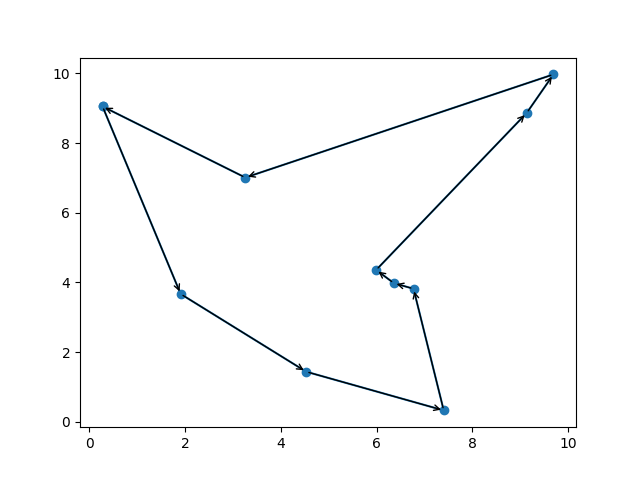

The optimum path which will give us minimum distance is [6, 5, 4, 3, 1, 7, 9, 8, 2, 0] 
And the respective minimum distance is 34.07656139463668


In [21]:
final_output("10City.txt", 10, 0.95, 1000)

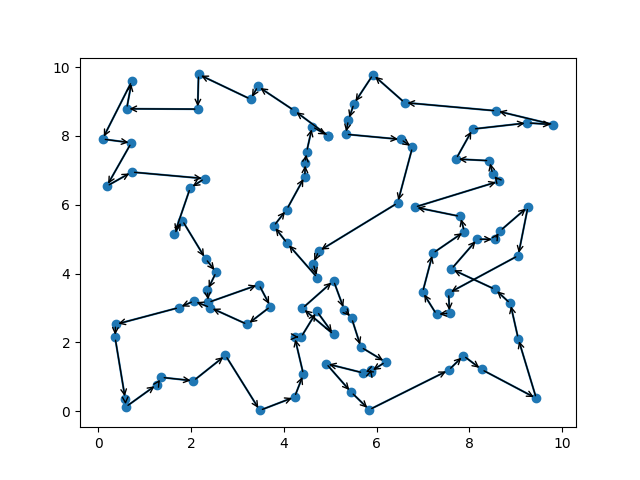

The optimum path which will give us minimum distance is [18, 36, 22, 21, 3, 54, 31, 55, 97, 53, 29, 59, 71, 90, 96, 73, 64, 28, 91, 20, 77, 35, 69, 83, 66, 9, 11, 37, 81, 44, 1, 70, 79, 43, 32, 33, 62, 10, 85, 78, 23, 67, 5, 26, 8, 13, 49, 75, 48, 58, 98, 46, 82, 51, 68, 47, 56, 45, 87, 92, 60, 38, 57, 12, 84, 72, 24, 74, 40, 94, 61, 63, 95, 0, 42, 50, 15, 39, 19, 25, 86, 30, 93, 14, 27, 7, 99, 65, 52, 34, 4, 89, 2, 41, 17, 88, 16, 76, 6, 80] 
And the respective minimum distance is 86.87458319322063


In [22]:
final_output("100City.txt", 5, 0.99, 10000)

Decay Rate = 0.95, Number of Iterations = 1000

For Temperature = 0.5 the Minimum Distance between all the cities is 174.13

For Temperature = 5 the Minimum Distance between all the cities is 166.747

For Temperature = 50.0 the Minimum Distance between all the cities is 173.752

For Temperature = 500.0 the Minimum Distance between all the cities is 175.382

For Temperature = 5000.0 the Minimum Distance between all the cities is 185.421

For Temperature = 50000.0 the Minimum Distance between all the cities is 190.143

For Temperature = 500000.0 the Minimum Distance between all the cities is 196.53

For Temperature = 5000000.0 the Minimum Distance between all the cities is 193.532



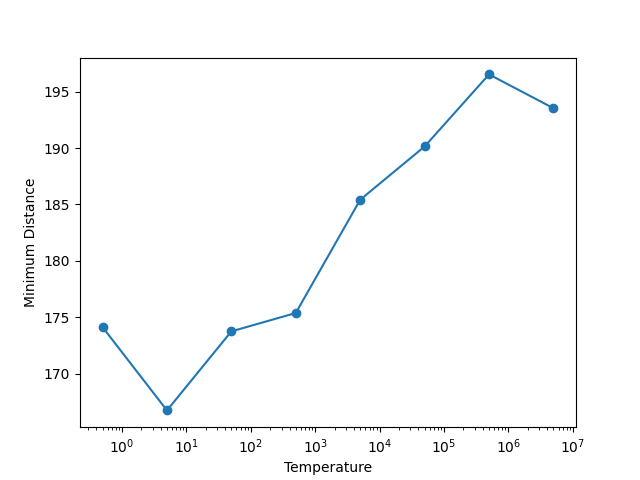

In [26]:
coords, x, y = get_coords("100City.txt")
Temp = [5e-1, 5, 5e1, 5e2, 5e3, 5e4, 5e5, 5e6]
Distances = []

print("Decay Rate = 0.95, Number of Iterations = 1000\n")

for i in Temp:
    c, d = optimise(coords, i, 0.95, 1000)
    Distances.append(d)
    print(f"For Temperature = {i} the Minimum Distance between all the cities is {round(d, 3)}\n")

plt.close()
plt.xlabel("Temperature")
plt.ylabel("Minimum Distance")
plt.xscale("log")
plt.plot(Temp, Distances, 'o-')
plt.show()

It can be seen from the graph that as we are increasing the 'Temperature' the minimum distance is increasing, which tells us that minimum distance travelled is inversely proportional to temperature. 

The reason for this could be that at higher temperatures, the algorithm accepts worse solutions with greater probability, allowing it to explore a larger portion of the search space. This can lead to better solutions being discovered in areas of the search space that are far from the current best solution. 

The algorithm becomes more selective in accepting only better solutions as the temperature drops. This directs the search to promising regions of the search space and helps to improve the algorithm's minimum distance.

Therefore it is necessary to consider the temperature that is high enough to allow the algorithm to explore the search space, but not so high that it accepts worse solutions too often.

Temperature = 5, Number of Iterations = 1000

For Decay Rate = 0.8 the minimum distance between all the cities is 168.685

For Decay Rate = 0.85 the minimum distance between all the cities is 176.233

For Decay Rate = 0.9 the minimum distance between all the cities is 172.345

For Decay Rate = 0.95 the minimum distance between all the cities is 172.223

For Decay Rate = 0.99 the minimum distance between all the cities is 165.395

For Decay Rate = 0.999 the minimum distance between all the cities is 262.695

For Decay Rate = 0.9999 the minimum distance between all the cities is 360.365

For Decay Rate = 0.99999 the minimum distance between all the cities is 362.932



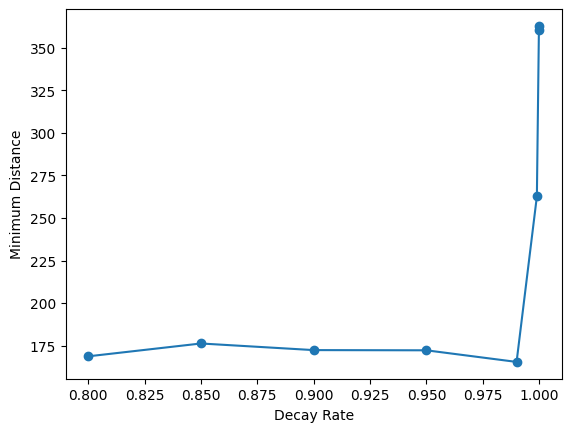

In [14]:
coords, x, y = get_coords("100City.txt")
Decay_rate = [0.8, 0.85, 0.9, 0.95, 0.99, 0.999, 0.9999, 0.99999]
Distances = []

print("Temperature = 5, Number of Iterations = 1000\n")

for i in Decay_rate:
    c, d = optimise(coords, 5, i, 1000)
    Distances.append(d)
    print(f"For Decay Rate = {i} the minimum distance between all the cities is {round(d, 3)}\n")
    
plt.xlabel("Decay Rate")
plt.ylabel("Minimum Distance")
plt.plot(Decay_rate, Distances, 'o-')
plt.show()

Here it can be seen that when the cooling rate is too slow and when the cooling rate is too fast, either ways we are not getting an optimised solution. Like it can be if it is too slow it takes a lot time to explore and when it is too fast it is converging is very vague.

The conclusion that can be made is an optimal cooling rate strikes a balance between the time needed to explore the search space and the time needed to converge towards the optimal solution as the cooling rate also plays a important role in determining the quality of the minimum distance found by the simulated annealing algorithm.

Temperature = 5, Decay_rate = 0.95

For Decay Rate = 1 the minimum distance between all the cities is 458.587

For Decay Rate = 10.0 the minimum distance between all the cities is 449.548

For Decay Rate = 100.0 the minimum distance between all the cities is 357.219

For Decay Rate = 1000.0 the minimum distance between all the cities is 175.489

For Decay Rate = 10000.0 the minimum distance between all the cities is 85.868



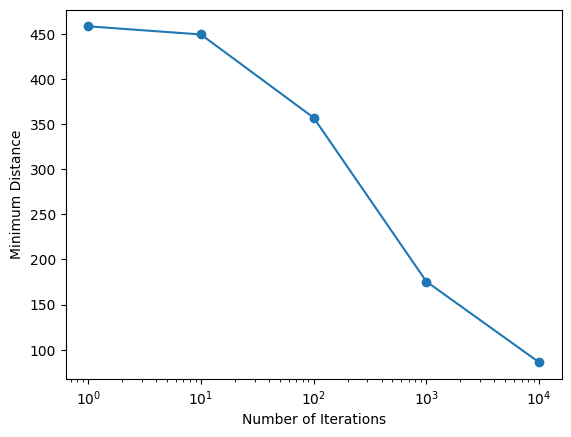

In [15]:
coords, x, y = get_coords("100City.txt")
Iterations = [1, 1e1, 1e2, 1e3, 1e4]
Distances = []

print("Temperature = 5, Decay_rate = 0.95\n")

for i in Iterations:
    c, d = optimise(coords, 5, 0.95, int(i))
    Distances.append(d)
    print(f"For number of Iterations = {i} the minimum distance between all the cities is {round(d, 3)}\n")
    
plt.xlabel("Number of Iterations")
plt.ylabel("Minimum Distance")
plt.xscale("log")
plt.plot(Iterations, Distances, 'o-')
plt.show()

Conclusions drawn:

- If the number of iterations is too small, the algorithm may not have enough time to explore the search space, and the minimum distance found may be far from the optimal solution. 
- On the other hand, if the number of iterations is too large, the algorithm may spend too much time exploring the search space, and the minimum distance found may not improve significantly beyond a certain point.
- An optimal number of iterations strikes a balance between the time needed to explore the search space and the time needed to converge towards the optimal solution.

In summary, the number of iterations plays an important role in determining the quality of the minimum distance found by the simulated annealing algorithm. An optimal number of iterations should balance the time needed to explore the search space and the time needed to converge towards the optimal solution.